<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/Abschnitt_1_Aufgaben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt



# GINN Teil 1

## 1.1 Basisnotation



*   $f: \mathbb{R} → \mathbb{R}$: Funktion aus der realen Welt
*   $D_f$: Datensatz der Funktion
*   $y$: tatsächlicher Funktionswert in der realen Welt
*   $S$: Stichprobe des Datensatzes
*   $\hat{f}$: berechenbare Funktion, die geschätzt werden soll
*   $\theta \in \mathbb{R}^m$: Parametermenge für die berechenbare Funktion
*   $\hat{y}$: berechneter Funktionswert
*   $\theta$ und $\hat{f}$ sind das **Modell**

### Beispiel zu den Konzepten

#### Datenvorbereitung

In [ ]:

# Setzen des Seeds für die Reproduzierbarkeit
np.random.seed(20)

# Erzeugen der Temperaturwerte
x = np.arange(0, 25.5, 0.5)

# Definition der Funktion für den Bierkonsum
def f(x):
    return 100 + 0.5 * x**2

# Erzeugen der tatsächlichen Y-Werte
y = f(x)

# Verrauschen der Werte
noise = np.random.normal(loc=5, scale=10, size=len(y))
y += noise

# Anpassungen spezifischer Werte
y[8:10] += 200  # Beachten Sie, dass Python bei 0 zu zählen beginnt, daher 9:10 in R entspricht 8:10 in Python


#Maskierung
mask = np.full((1,len(y)), True, dtype=bool)[0]
mask[15:17] = False


x_clean = x[mask]
y_clean = y[mask]

# Polynomial fitting function
def f_hat(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 #+ e*x**5 + e*x**6

# Fitting the curve
theta, _ = curve_fit(f_hat, x_clean, y_clean)


#### Ausgabe des Plots

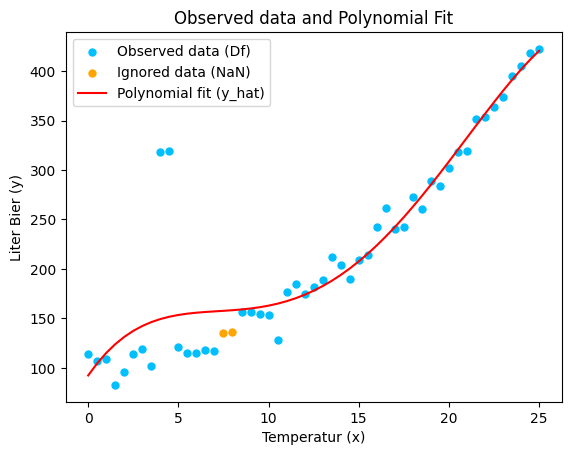

In [ ]:
# Plotting the original data and the fitted curve
plt.scatter(x[mask], y[mask], color='deepskyblue', s=25, label='Observed data (Df)')
plt.scatter(x[~mask], y[~mask], color='orange', s=25, label='Ignored data (NaN)')  # NaN Daten in anderer Farbe
plt.plot(x, f_hat(x, *theta), color='red', label='Polynomial fit (y_hat)')

plt.xlabel('Temperatur (x)')
plt.ylabel('Liter Bier (y)')
plt.title('Observed data and Polynomial Fit')
plt.legend()
plt.show()

###Aufgaben



*   Verändern Sie $\theta$, indem Sie Parameter hinzufügen oder entfernen und interpretieren Sie die Effekte
*   Verändern Sie die Stichprobe $S_{D_f } $ (z.B. durch das Maskieren zusätzlicher Daten oder das Modifizieren von Daten) und interpretieren Sie die Effekte
*  Plotten Sie die maskierten Daten in einer anderen Farbe, um (visuell) analysieren zu können wir gut die gelernte Kurve auf diese passt


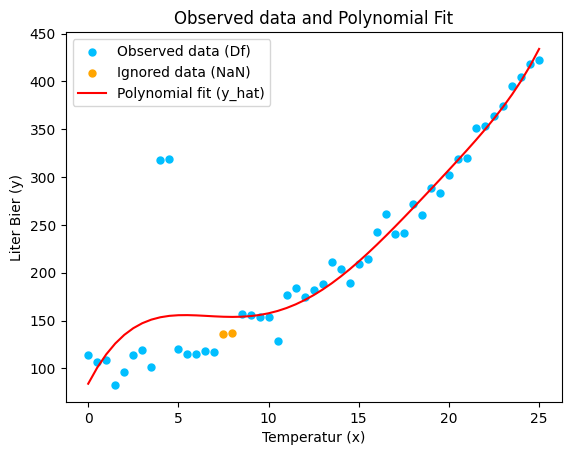

In [ ]:
# Ihr Code Hier
mask = np.full((1,len(y)), True, dtype=bool)[0]
mask[15:17] = False

x_clean = x[mask]
y_clean = y[mask]

# Polynomial fitting function
def f_hat(x, a, b, c, d, e, f, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6

# Fitting the curve
theta, _ = curve_fit(f_hat, x_clean, y_clean)

# Plotting the original data and the fitted curve
plt.scatter(x[mask], y[mask], color='deepskyblue', s=25, label='Observed data (Df)')
plt.scatter(x[~mask], y[~mask], color='orange', s=25, label='Ignored data (NaN)')  # NaN Daten in anderer Farbe
plt.plot(x, f_hat(x, *theta), color='red', label='Polynomial fit (y_hat)')

plt.xlabel('Temperatur (x)')
plt.ylabel('Liter Bier (y)')
plt.title('Observed data and Polynomial Fit')
plt.legend()
plt.show()

## 1.3 Verlust



*   $L: R^m  \times R^n  \to R_{ \ge 0}$: Verlustfunktion
*   $J\left( {x,y,\theta } \right)$: Einzelverlust
*   $J_s\left( {\theta } \right)$: Mittlerer Verlust auf der Stichprobe
*   $\hat {\theta }$: Ideales Modell bei Verlustminimierung
*   $u$: Vektor mehrerer $\hat{y}$
*   $v$: Vektor mehrerer $y$
*   $\left\| {u - v} \right\|_2$ : L2-Norm
*   $L = \frac{{\left\| {u - v} \right\|_{2}^{2} }}{n}$ : MSE als Verlustfunktion

### Aufgaben



*   Berechnen Sie $J_s\left( {\theta } \right)$ mit $L = MSE$
*   Finden Sie einen Möglichkeit zur Verringerung von $J_s\left( {\theta } \right)$. Können Sie die optimale Anzahl Parameter in $\theta$  bestimmen?
*   Nutzen Sie alternativ $L = MAE = \frac{{\left\| {u - v} \right\|_{1}^{1} }}{n}$ . Wie verändert sich die optimale Anzahl Parameter in $\theta$ und warum?
*   Für ein Modell mit $|\theta|=4$ Parametern, also einem Polynom mit Grad 3, beeinflusst eine Erhöhung des zweiten oder des dritte Parameters in $\theta$, also $(\theta_2, \theta_3)$, für $S_4$ den Wert von $J\left( {x,y,\theta } \right)$ bei $L = {\left\| {u - v} \right\|_{2}^{2} }$ stärker? Hinweis: Berechnen Sie $\frac{{\partial L\left( {u,v} \right)}}{{\partial \theta _2 }}$ vs. $\frac{{\partial L\left( {u,v} \right)}}{{\partial \theta _3 }}$


In [ ]:
# Ihr Code Hier
n = len(y)

def poly_fit_degree(x, *params):
    return sum([p * x**i for i, p in enumerate(params)])

def mse(f_hat, x, theta, y):
  return (1/n)*sum(abs(f_hat(x, *theta) - y)**2)

def mae(f_hat, x, theta, y):
  return (1/n)*sum(abs(f_hat(x, *theta)- y))

# Iterating over polynomial degrees from 2 to 8
degrees = range(1, 20)
fit_params = []
mse_values = []
mae_values = []

# Fitting and calculating MSE for each degree
for degree in degrees:
    # Curve fitting
    popt, _ = curve_fit(poly_fit_degree,  x_clean, y_clean, maxfev=10000, p0=np.ones(degree))
    fit_params.append(popt)
    mse_val = mse(poly_fit_degree, x_clean, popt, y_clean)
    mse_values.append(mse_val)
    mae_val = mae(poly_fit_degree, x_clean, popt, y_clean)
    mae_values.append(mae_val)



min_mse = np.argmin(mse_values) + 1
min_mae = np.argmin(mae_values) + 1

Da curve_fit mit dem MSE arbeitet, sinkt dieser mit der Erhöhung der Parameteranzahl.
Beim MAE steigt der Wert zuerst mit zusätzlichen Parametern und fällt dann.

Die Funktion wurde so angepasst, dass extreme Werte möglichst schnell berücksichtigt werden (MSE), das kann am Anfang den MAE erhöhen.

In [ ]:
print("Min MSE: ", min_mse)
print("Min MAE: ", min_mae)

Min MSE:  13
Min MAE:  13


In [ ]:
# 4)
# from math import dist
from sympy import *


# def loss(u, v):
#   return dist(u, v)

# degree = 4
# theta, _ = curve_fit(poly_fit_degree,  x_clean, y_clean, maxfev=10000, p0=np.ones(degree))
# y_hat = poly_fit_degree(x_clean, *theta)

# Definiere Symbole
u, v, x, theta1,theta2, theta3, theta4 = sp.symbols('u v x theta1 theta2 theta3 theta4')

# Definiere L(u, v)
L = (theta1 + theta2*x + theta3*x**2 + theta4*x**3 - v)**2

# Berechne die partiellen Ableitungen
partial_L_theta2 = sp.diff(L, theta2)
partial_L_theta3 = sp.diff(L, theta3)

In [ ]:
partial_L_theta2

2*x*(theta1 + theta2*x + theta3*x**2 + theta4*x**3 - v)

In [ ]:
partial_L_theta3

2*x**2*(theta1 + theta2*x + theta3*x**2 + theta4*x**3 - v)

Eine Erhöhung von θ3 beeinflusst das Modell stärker als θ2